In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/questions.csv')
df.shape

(404351, 6)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
74424,74424,147894,147895,What are the best ways to start your day?,What is the best way to start your day?,1
317060,317060,622158,622159,"What's the best and most secure, trustworthy, ...",What is the best TOR VPN for Android phones?,0
35163,35163,70067,70068,I'm 23 and currency 5'8. Can I grow 7 inches t...,How can I increase my height after I'm 23 year...,0
269772,269772,530617,530618,Why don't planes use massive parachutes?,Why don’t planes have parachutes?,1
349890,349890,685473,685474,Is Xiaomi a brand to trust (comparing it with ...,Is xiaomi a trusted brand?,0
396589,396589,774947,774948,Can you start your own country?,How do I start your own country?,1
12164,12164,24286,24287,What is rice puller?,What is rice puller? Are its properties real? ...,1
154699,154699,305959,305960,Can information collected from minors on a web...,I would like to make a website for my collegia...,0
80127,80127,159171,159172,How do we learn from mistakes?,What is the best way to learn from mistakes?,1
395497,395497,772852,772853,What is cause of gravity?,What is the cause of earth's gravity?,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
#duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

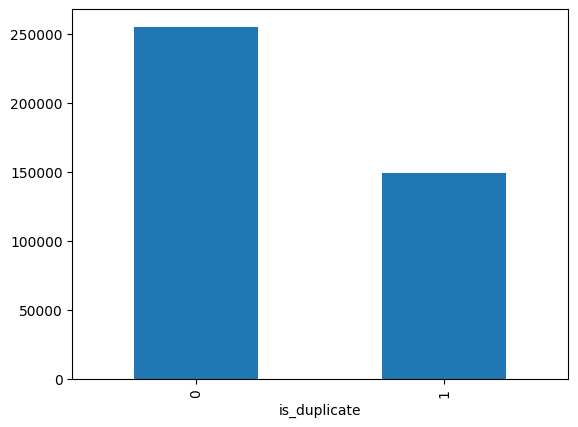

In [ ]:
#distribution of duplicate and non-duplicate questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
#Repeated questions
qid=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


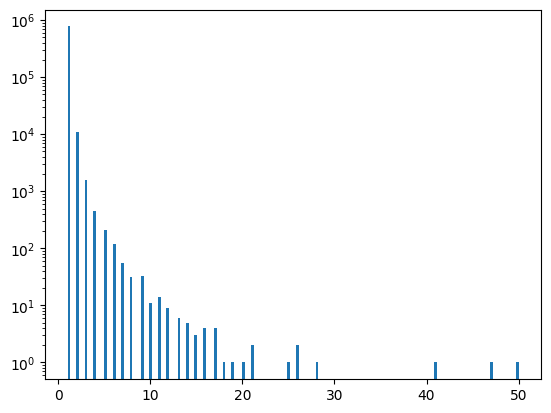

In [ ]:
#Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
#started
new_df=df.sample(30000,)

In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       0
is_duplicate    0
dtype: int64

In [ ]:
new_df.duplicated().sum()

0

In [ ]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
25414,I want to show travel packages in my site from...,How good are the package European trips offere...
62775,Does long distance relationships actually work?,What does it take for a successful long distan...
312559,Should I go for my passion or what my mom and ...,My dad is against me joining the army reserves...
153949,Why are my garden plants not growing?,What plant is growing in my garden here?
388105,Where was The Flintstones in Viva Rock Vegas f...,Why do my eyes hurt on the film set?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

In [ ]:
temp_df

In [ ]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [ ]:
temp_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Remove NaN values from target variable
not_nan_index = ~np.isnan(y_train)
X_train = X_train[not_nan_index]
y_train = y_train[not_nan_index]

not_nan_index = ~np.isnan(y_test)
X_test = X_test[not_nan_index]
y_test = y_test[not_nan_index]

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
# adding features to improve accuracy
new_df=df.sample(30000,random_state=2)

In [ ]:
new_df.isnull().sum()

In [ ]:
new_df.head()

In [ ]:
new_df.duplicated().sum()

In [ ]:
#Distribution of duplicate and non-duplicate questions
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Repeated questions
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

In [ ]:
# repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
# feature engineering
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [ ]:
new_df.head()

In [ ]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

In [ ]:
def common_words(row):
  w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return len(w1 & w2)

In [ ]:
new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()

In [ ]:
def total_words(row):
  w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1)+len(w2))

In [ ]:
new_df['word_total']=new_df.apply(total_words,axis=1)
new_df.head()

In [ ]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

In [ ]:
# analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters', int(new_df['q1_len'].mean()))

In [ ]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

In [ ]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

In [ ]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

In [ ]:
# common words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
# total words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
#word share
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
ques_df=new_df[['question1','question2']]
ques_df.head()

In [ ]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

In [ ]:
# applying BOW
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

In [ ]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
# adding preprocessing and advance feature to improve accuracy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')


In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/questions.csv')

In [ ]:
new_df=df.sample(30000,random_state=2)

In [ ]:
new_df.head( )

In [ ]:
def preprocess(q):
  # q->question
  q=str(q).lower().strip()

  # Replace certain special characters with their string equivalents
  q=q.replace('%','percent')
  q=q.replace('$','dollar')
  q=q.replace('₹','rupee')
  q=q.replace('€','euro')
  q=q.replace('@','at')

  # the pattern '[math]' appears around 900 times in the whole dataset.
  q=q.replace('[math]','')

  # replacing some numbers with string equivalents
  q=q.replace(',000,000,000 ','b ')
  q=q.replace(',000,000 ','m ')
  q=q.replace(',000','k ')
  q=re.sub(r'([0-9]+)000000000',r'\1b',q)
  q=re.sub(r'([0-9]+)000000',r'\1m',q)
  q=re.sub(r'([0-9]+)000',r'\1k',q)

  # Decontracting words
  contractions = {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
 "you've": "you have"
 }

  q_decontracted=[]

  for word in q.split():
   if word in contractions:
     word=contractions[word]

   q_decontracted.append(word)

  q=' '.join(q_decontracted)
  q=q.replace("'ve"," have")
  q=q.replace("n't"," not")
  q=q.replace("'re"," are")
  q=q.replace("'ll"," will")

  # removing HTML tags
  q=BeautifulSoup(q)
  q=q.get_text()

  # remove punctuations
  pattern=re.compile('\W')
  q=re.sub(pattern,' ',q).strip()

  return q

In [ ]:
preprocess("I 've already! wasn't <b> done</b>?")

In [ ]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [ ]:
new_df.head()

In [ ]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [ ]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

In [ ]:
def common_words(row):
  w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return len(w1 & w2)

In [ ]:
new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()

In [ ]:
def total_words(row):
  w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1)+len(w2))

In [ ]:
new_df['word_total']=new_df.apply(total_words,axis=1)
new_df.head()

In [ ]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

In [ ]:
# Advanced features
from nltk.corpus import stopwords

def fetch_token_features(row):
  q1=row['question1']
  q2=row['question2']

  SAFE_DIV=0.0001

  STOP_WORDS=stopwords.words("english")

  token_features=[0.0]*8

  #converting the sentence into tokens
  q1_tokens=q1.split()
  q2_tokens=q2.split()

  if len(q1_tokens)==0 or len(q2_tokens)==0:
    return token_features

  #get the non-stopwords in questions
  q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])

  #get the stopwords in question
  q1_stops=set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_stops=set([word for word in q1_tokens if word not in STOP_WORDS])

  #get the common non-stopwords from question pair
  common_word_count=len(q1_words.intersection(q2_words))

  #get the common stopwords from pair
  common_stop_count=len(q1_stops.intersection(q2_stops))

  #get the common tokens from question pair
  common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+ SAFE_DIV)
  token_features[1]=common_word_count/(min(len(q1_words),len(q2_words))+ SAFE_DIV)
  token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+ SAFE_DIV)
  token_features[3]=common_stop_count/(min(len(q1_stops),len(q2_stops))+ SAFE_DIV)
  token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+ SAFE_DIV)
  token_features[5]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+ SAFE_DIV)

  #last word of both question is same or not
  token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])

  #first word of both question is same or not
  token_features[7]=int(q1_tokens[0]==q2_tokens[0])

  return token_features

In [ ]:
token_features=new_df.apply(fetch_token_features,axis=1)

In [ ]:
new_df["cwc_min"]=list(map(lambda x: x[0],token_features))
new_df["cwc_max"]=list(map(lambda x: x[1],token_features))
new_df["csc_min"]=list(map(lambda x: x[2],token_features))
new_df["csc_max"]=list(map(lambda x: x[3],token_features))
new_df["ctc_min"]=list(map(lambda x: x[4],token_features))
new_df["ctc_max"]=list(map(lambda x: x[5],token_features))
new_df["last_word_eq"]=list(map(lambda x: x[6],token_features))
new_df["first_word_eq"]=list(map(lambda x: x[7],token_features))

In [ ]:
new_df.head( )

In [ ]:
pip install Distance

In [ ]:
import distance

def fetch_length_features(row):

  q1=row['question1']
  q2=row['question2']

  length_features=[0.0]*3

  # converting the sentence into tokens
  q1_tokens=q1.split()
  q2_tokens=q2.split()

  if(len(q1_tokens)==0 or len(q2_tokens)==0):
    return length_features

  # absolute length features
  length_features[0]=abs(len(q1_tokens)-len(q2_tokens))

  # average token length of both questions
  length_features[1]=abs(len(q1_tokens)+len(q2_tokens))/2

  strs=list(distance.lcsubstrings(q1,q2))
  length_features[2]=len(strs[0])/(min(len(q1),len(q2))+1)

  return length_features

In [ ]:
length_features=new_df.apply(fetch_length_features,axis=1)

In [ ]:
new_df['abs_len_diff']=list(map(lambda x:x[0],length_features))
new_df['mean_len']=list(map(lambda x:x[1],length_features))
new_df['longest_substr_ratio']=list(map(lambda x:x[2],length_features))

In [ ]:
new_df.head()

In [ ]:
pip install fuzzywuzzy

In [ ]:
# fuzzy features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

  q1=row['question1']
  q2=row['question2']

  fuzzy_features=[0.0]*4

  #fuzz_ratio
  fuzzy_features[0]=fuzz.QRatio(q1,q2)

  #fuzz_partial_ratio
  fuzzy_features[1]=fuzz.partial_ratio(q1,q2)

  #token_sort_ratio
  fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)

  #token_set_ratio
  fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

  return fuzzy_features

In [ ]:
fuzzy_features=new_df.apply(fetch_fuzzy_features,axis=1)

In [ ]:
# creating new feature columns for fuzzy features
new_df['fuzz_ratio']=list(map(lambda x:x[0],fuzzy_features))
new_df['fuzz_partial_ratio']=list(map(lambda x:x[1],fuzzy_features))
new_df['token_sort_ratio']=list(map(lambda x:x[2],fuzzy_features))
new_df['token_set_ratio']=list(map(lambda x:x[3],fuzzy_features))

In [ ]:
print(new_df.shape)
new_df.head()

In [ ]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

In [ ]:
# using TSNE for dimentionality reduction for 15 features(generated after cleaning the data) to 3 dimension
from sklearn.preprocessing import MinMaxScaler

X=MinMaxScaler().fit_transform(new_df[['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq']])
y=new_df['is_duplicate'].values

In [ ]:
from sklearn.manifold import TSNE

tsne2d=TSNE(
    n_components=2,
    init='random', #pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

In [ ]:
ques_df=new_df[['question1','question2']]
ques_df.head()

In [ ]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

In [ ]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1=xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# for random forest model
confusion_matrix(y_test,y_pred)

In [ ]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import distance
from fuzzywuzzy import fuzz
import pickle
import numpy as np

cv=pickle.load(open('cv.pkl','rb'))

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [ ]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))


In [ ]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
rf.predict(query_point_creator(q1,q4))

In [ ]:
cv

In [ ]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))